In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

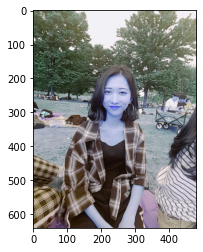

In [2]:
model_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/models/shape_predictor_68_face_landmarks.dat'
sticker_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/cat-whiskers.png'
my_image_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/Dasol.jpg'

img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

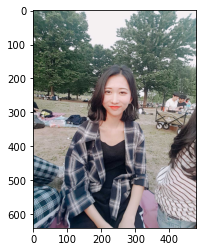

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(195, 216) (285, 305)]]
195 216 285 305


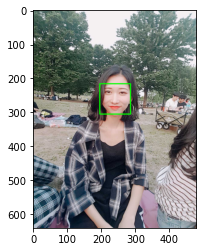

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print(l,t,r,b) # l-left, t=top, r=right, b=bottom

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


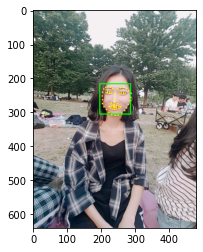

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2], landmark[36], landmark[48], landmark[30]) # nose center index : 30
    x = landmark[30][0] - dlib_rect.width()//2
    y = landmark[30][1] - dlib_rect.height()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(bbox_w,bbox_h) : (%d,%d)'%(w,h))

(203, 263) (213, 241) (222, 282) (238, 270)
(x,y) : (193,225)
(bbox_w,bbox_h) : (91,90)


(90, 91, 3)


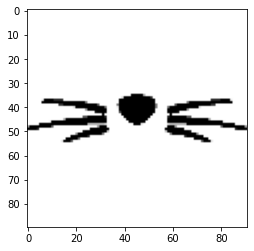

In [11]:
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) #스티커를 bbox 사이즈로 resize
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [12]:
refined_x = x # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (193,225)


In [13]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
else:
    print (img_sticker.shape)
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(90, 91, 3)
(x,y) : (193,225)


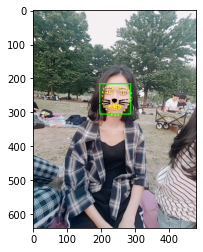

In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

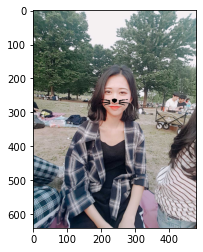

In [15]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()